<a href="https://colab.research.google.com/github/anuragverse/ML-Workshop/blob/main/ML_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      Brand         Model  Screen Size (inches)  Resolution Width  \
0     Apple     iPhone 14                  6.10              2532   
1     Apple     iPhone 13                  6.10              2532   
2   Samsung    Galaxy S23                  6.10              2340   
3   Samsung    Galaxy S22                  6.20              2340   
4  Motorola     Moto G200                  6.80              2460   
5  Motorola  Moto Edge 30                  6.50              2400   
6     Nokia     Nokia X30                  6.43              2400   
7     Nokia     Nokia G60                  6.58              2400   

   Resolution Height  Price (rs)  Cluster  
0               1170       79900      2.0  
1               1170       69900      2.0  
2               1080       79900      3.0  
3               1080       84900      3.0  
4               1080       59900      2.0  
5               1080       44900      2.0  
6               1080       35000      2.0  
7               1080      

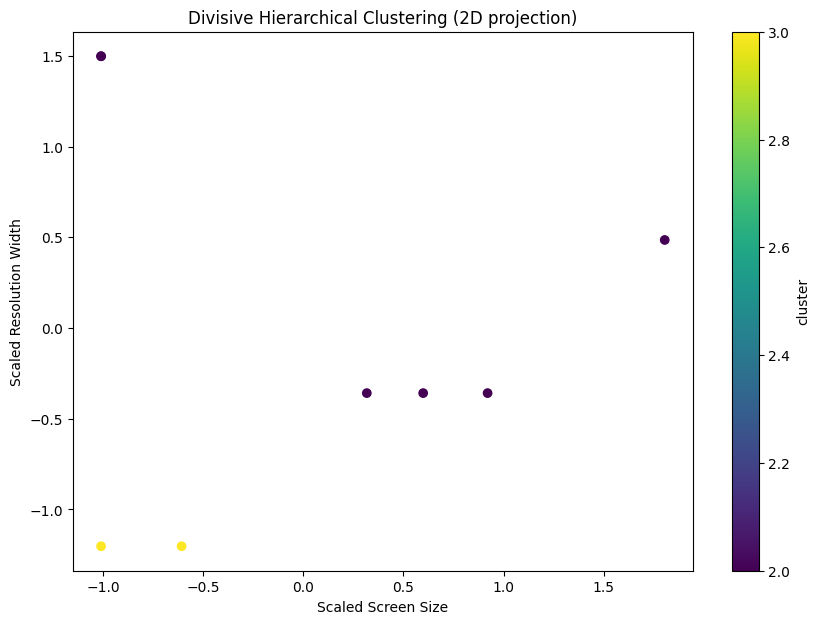

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Step 1: Load the mobile display data (same as before)
data = {
    'Brand': ['Apple', 'Apple', 'Samsung', 'Samsung', 'Motorola', 'Motorola', 'Nokia', 'Nokia'],
    'Model': ['iPhone 14', 'iPhone 13', 'Galaxy S23', 'Galaxy S22', 'Moto G200', 'Moto Edge 30', 'Nokia X30', 'Nokia G60'],
    'Screen Size (inches)': [6.1, 6.1, 6.1, 6.2, 6.8, 6.5, 6.43, 6.58],
    'Resolution (pixels)': ['2532x1170', '2532x1170', '2340x1080', '2340x1080', '2460x1080', '2400x1080', '2400x1080', '2400x1080'],
    'Price (rs)': [79900, 69900, 79900, 84900, 59900, 44900, 35000, 25000]
}

df = pd.DataFrame(data)

# Step 2: Preprocessing - Convert the resolution to numeric (width and height in pixels)
df[['Resolution Width', 'Resolution Height']] = df['Resolution (pixels)'].str.split('x', expand=True)
df[['Resolution Width', 'Resolution Height']] = df[['Resolution Width', 'Resolution Height']].astype(int)

# Step 3: Select the features for clustering: 'Screen Size', 'Resolution Width', 'Resolution Height', and 'Price'
features = df[['Screen Size (inches)', 'Resolution Width', 'Resolution Height', 'Price (rs)']]

# Step 4: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 5: Divisive Hierarchical Clustering (Top-Down)
def divisive_hierarchical_clustering(X, max_clusters=4):
    # Start with all points in one cluster
    clusters = [list(range(len(X)))]  # List of indices of points in each cluster
    cluster_labels = np.zeros(len(X))  # To store final cluster labels

    # While there is more than one cluster and we haven't reached max_clusters
    while len(clusters) < max_clusters:
        # Find the largest cluster to split
        largest_cluster_idx = max(range(len(clusters)), key=lambda i: len(clusters[i]))
        cluster_points = clusters[largest_cluster_idx]

        # Extract the points of the largest cluster
        X_cluster = X[cluster_points]

        # Use KMeans to split the largest cluster into two
        kmeans = KMeans(n_clusters=2, random_state=42)
        kmeans.fit(X_cluster)

        # Assign the points to new clusters
        cluster_labels[cluster_points] = kmeans.labels_ + len(clusters)  # Offset for new cluster labels

        # Split the largest cluster into two
        clusters[largest_cluster_idx] = [cluster_points[i] for i in range(len(cluster_points)) if kmeans.labels_[i] == 0]
        clusters.append([cluster_points[i] for i in range(len(cluster_points)) if kmeans.labels_[i] == 1])

    return cluster_labels

# Perform divisive clustering
df['Cluster'] = divisive_hierarchical_clustering(scaled_features, max_clusters=3)

# Step 6: Visualize the results
print(df[['Brand', 'Model', 'Screen Size (inches)', 'Resolution Width', 'Resolution Height', 'Price (rs)', 'Cluster']])

# Optionally visualize clusters in a 2D plot (using first two features for simplicity)
plt.figure(figsize=(10, 7))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('Divisive Hierarchical Clustering (2D projection)')
plt.xlabel('Scaled Screen Size')
plt.ylabel('Scaled Resolution Width')
plt.colorbar(label='cluster')
plt.show()


In [3]:
import matplotlib.pyplot as plt

# Example visualization for KMeans clustering

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)

plt.xlabel('Feature 1')

plt.ylabel('Feature 2')

plt.title('KMeans Clustering')

plt.show()

NameError: name 'X' is not defined

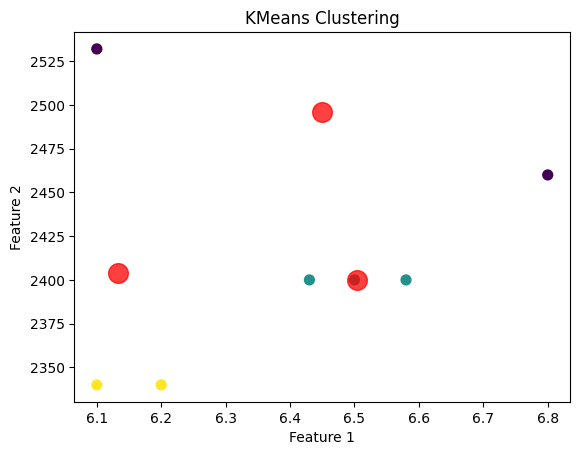

In [5]:
import matplotlib.pyplot as plt
import pandas as pd # Assuming X should be a DataFrame
from sklearn.cluster import KMeans # Assuming kmeans is a KMeans object

# ... [Your code to load and preprocess data, fit KMeans] ...
# ... Assuming 'features' variable from your previous code holds the data ...

# Replace 'features' with your actual data variable if different
X = pd.DataFrame(features)

# Fit KMeans to your data
kmeans = KMeans(n_clusters=3, random_state=0) # Example with 3 clusters
y_kmeans = kmeans.fit_predict(X)

# ... [Now you can visualize] ...

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)

plt.xlabel('Feature 1')

plt.ylabel('Feature 2')

plt.title('KMeans Clustering')

plt.show()

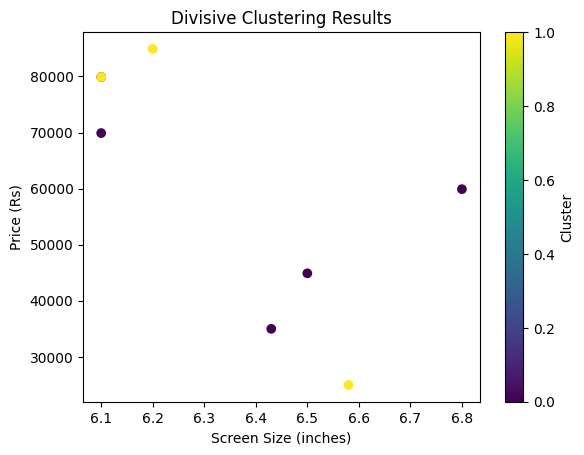

      Brand         Model  Screen Size (inches)  Resolution Width  \
0     Apple     iPhone 14                  6.10              2532   
1     Apple     iPhone 13                  6.10              2532   
2   Samsung    Galaxy S23                  6.10              2340   
3   Samsung    Galaxy S22                  6.20              2340   
4  Motorola     Moto G200                  6.80              2460   
5  Motorola  Moto Edge 30                  6.50              2400   
6     Nokia     Nokia X30                  6.43              2400   
7     Nokia     Nokia G60                  6.58              2400   

   Resolution Height  Price (Rs)  Cluster  
0               1170       79900      0.0  
1               1170       69900      0.0  
2               1080       79900      1.0  
3               1080       84900      1.0  
4               1080       59900      0.0  
5               1080       44900      0.0  
6               1080       35000      0.0  
7               1080      

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the mobile display data
data = {
    'Brand': ['Apple', 'Apple', 'Samsung', 'Samsung', 'Motorola', 'Motorola', 'Nokia', 'Nokia'],
    'Model': ['iPhone 14', 'iPhone 13', 'Galaxy S23', 'Galaxy S22', 'Moto G200', 'Moto Edge 30', 'Nokia X30', 'Nokia G60'],
    'Screen Size (inches)': [6.1, 6.1, 6.1, 6.2, 6.8, 6.5, 6.43, 6.58],
    'Resolution (pixels)': ['2532x1170', '2532x1170', '2340x1080', '2340x1080', '2460x1080', '2400x1080', '2400x1080', '2400x1080'],
    'Price (Rs)': [79900, 69900, 79900, 84900, 59900, 44900, 35000, 25000]
}

df = pd.DataFrame(data)

# Step 2: Preprocessing - Convert the resolution to numeric (width and height in pixels)
df[['Resolution Width', 'Resolution Height']] = df['Resolution (pixels)'].str.split('x', expand=True)
df[['Resolution Width', 'Resolution Height']] = df[['Resolution Width', 'Resolution Height']].astype(int)

# Step 3: Select the features for clustering: 'Screen Size', 'Resolution Width', 'Resolution Height', and 'Price'
features = df[['Screen Size (inches)', 'Resolution Width', 'Resolution Height', 'Price (Rs)']]

# Step 4: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 5: Divisive Clustering (DIANA-like approach using KMeans to recursively split the clusters)
def divisive_clustering(data, min_cluster_size=2, max_depth=3):
    # Start with all data in one cluster
    clusters = [np.arange(data.shape[0])]  # list of indices for the whole dataset
    cluster_labels = -1 * np.ones(data.shape[0])  # Initialize cluster labels with -1

    # Recursively split the clusters
    def split_cluster(cluster_idx, depth):
        if depth >= max_depth or len(clusters[cluster_idx]) <= min_cluster_size:
            return

        # Perform KMeans to split the cluster into two
        kmeans = KMeans(n_clusters=2, random_state=42)
        kmeans.fit(data[clusters[cluster_idx]])  # Fit KMeans to the subset of data

        # Assign cluster labels to the indices in this cluster
        cluster_labels[clusters[cluster_idx]] = kmeans.labels_

        # Split the cluster and recurse
        left_cluster_idx = len(clusters)
        right_cluster_idx = len(clusters) + 1
        clusters.append(clusters[cluster_idx][kmeans.labels_ == 0])
        clusters.append(clusters[cluster_idx][kmeans.labels_ == 1])

        split_cluster(left_cluster_idx, depth + 1)
        split_cluster(right_cluster_idx, depth + 1)

    # Initialize splitting
    split_cluster(0, 0)

    return cluster_labels

# Step 6: Apply Divisive Clustering
df['Cluster'] = divisive_clustering(scaled_features)

# Step 7: Visualize the results with a scatter plot
plt.scatter(df['Screen Size (inches)'], df['Price (Rs)'], c=df['Cluster'], cmap='viridis')
plt.title('Divisive Clustering Results')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Price (Rs)')
plt.colorbar(label='Cluster')
plt.show()

# Step 8: Display the DataFrame with cluster labels
print(df[['Brand', 'Model', 'Screen Size (inches)', 'Resolution Width', 'Resolution Height', 'Price (Rs)', 'Cluster']])